
# Aprendizaje No supervisado: K-means Clustering

    En este código de ejemplo se mostrará un caso de clasificación de datos utilizando el método de *K-Means*. 
Este modelo se utiliza principalmente para casos en los que no se tiene una clasificación definida de los datos, ya que el objetivo de este modelo es el de clasificar los datos dependiendo de su cercania entre si, osea su similitud entre estos.


---

Leo los datos de un csv y acomodo los ejes para visualizar los datos.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

csv_data = "resources/xor.csv"

with open(csv_data, "r") as file:
    header = file.readline()
    csv_reader = csv.reader(file)
    data_list = []
    x = []
    y = []
    for row in csv_reader:

        #   Si bien con los datos completos puedo tener una clasificación similar, 
        # solamente se tomará la mitad para resaltar el criterio de clasificación.
        if (row[0] == "C1"):
            x.append(float(row[1]))
            y.append(float(row[2]))

train_data = list(zip(x, y))

Defino la función en la que se realizará el algoritmo K-means.

In [2]:
def KMeans_model(data, k):
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(data)
    
    return kmeans

Este método no cuenta con un método teórico para determinar cuantos clusters son la cantidad óptima para el modelo, por lo que el enfoque práctico se basa en aplicar el modelo con un *k* número de clusters y comparar los resultados.
Un método util para ver esto, es el llamado **método del codo** (elbow method) que consiste en tomar el tomar del punto mas alto de inercia.

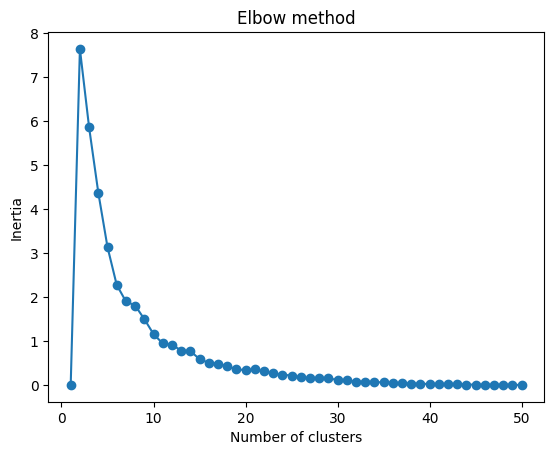

In [11]:

inertias = []

for i in range(1,len(train_data)):
    kmeans_group = KMeans_model(train_data, i)
    inertias.append(kmeans_group.inertia_)
inertias[0] = 0
plt.plot(range(1,len(train_data)), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Como en este caso el punto de mayor inercia está en un *k = 2* por lo que se usará esta cantidad.

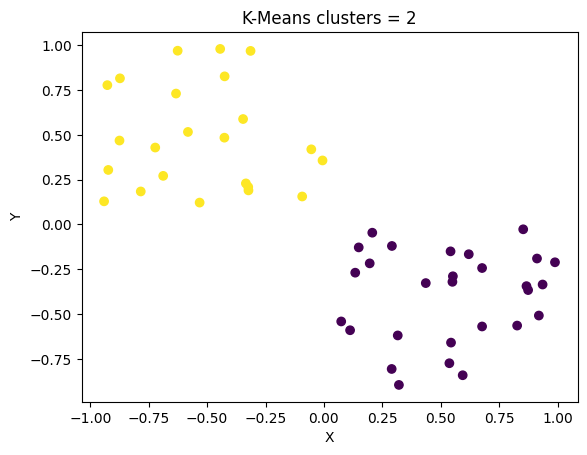

In [8]:
clusters = 2

classification = KMeans_model(train_data, clusters).labels_

plt.title(f'K-Means clusters = {clusters}')
plt.scatter(x, y, c=classification)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

El principio detrás de este modelo, cosiste en los siguientes pasos:
1. Agrupar los datos en *k* grupos.
2. Ubicar al azar un *k* número de *centros*. 
3. Recorrer todos los datos y asignarlos al *centro* mas cercano.
4. Se cambia el *centro* del grupo tomando el promedio de la posición de todos los puntos.
5. Repetir los pasos 2, 3 y 4 hasta que los *centros* dejen de cambiar.